In [1]:
! pip install pandas-datareader

## Importing libraries

In [53]:
import pandas_datareader.data as web
import datetime
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import plotly.figure_factory as ff


In [3]:
start_date = datetime.datetime(2021, 1, 1)
end_date = datetime.datetime.now()

## Analysing Google Stocks

In [4]:
google = pd.DataFrame(web.DataReader('GOOGL', 'yahoo', start_date, end_date))
google.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-04,1762.489990,1707.140015,1760.000000,1726.130005,1866200,1726.130005
2021-01-05,1746.829956,1716.900024,1725.089966,1740.050049,1018000,1740.050049
2021-01-06,1743.969971,1696.099976,1700.260010,1722.880005,2329400,1722.880005
2021-01-07,1777.819946,1726.760010,1726.760010,1774.339966,2096800,1774.339966
2021-01-08,1799.359985,1761.219971,1777.160034,1797.829956,1774200,1797.829956


In [5]:
google.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [6]:
fig = go.Figure()
# fig.add_trace(go.Scatter(x=google.index.get_level_values('Date'), y = google['Open'], mode = 'lines + markers', name = 'Open Price'))
# fig.add_trace(go.Scatter(x=google.index.get_level_values('Date'), y = google['Close'], mode = 'lines + markers', name = 'Close Price'))
fig.add_trace(go.Scatter(x=google.index.get_level_values('Date'), y = google['High'], mode = 'lines + markers', name = 'High Price'))
fig.add_trace(go.Scatter(x=google.index.get_level_values('Date'), y = google['Low'], mode = 'lines + markers', name = 'Low Price'))
fig.update_layout(title = 'Google Daily Stock Prices', yaxis_title = 'Stock Prices', xaxis_title = 'Date')
fig.show()

In [7]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=google.index.get_level_values('Date'), y = google['Volume'], mode = 'lines + markers', name = 'Volume'))
fig.update_layout(title = 'Volume Traded by Google', yaxis_title = 'Stock Prices', xaxis_title = 'Date')
fig.show()

## Analysing different Cars Stocks (Tesla, Ford, GM)

In [8]:
start_date = datetime.datetime(2013, 1, 1)
end_date = datetime.datetime(2018, 1, 1)

In [9]:
tesla = pd.DataFrame(web.DataReader('TSLA', 'yahoo', start_date, end_date))
ford = pd.DataFrame(web.DataReader('F', 'yahoo', start_date, end_date))
gm_motors = pd.DataFrame(web.DataReader('GM', 'yahoo', start_date, end_date))

In [10]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=tesla.index.get_level_values('Date'), y = tesla['High'], mode = 'lines', name = 'Tesla High Price'))
fig.add_trace(go.Scatter(x=ford.index.get_level_values('Date'), y = ford['High'], mode = 'lines', name = 'Ford High Price'))
fig.add_trace(go.Scatter(x=gm_motors.index.get_level_values('Date'), y = gm_motors['High'], mode = 'lines', name = 'GM High Price'))
fig.update_layout(title = 'Daily Stock Prices', yaxis_title = 'Stock Prices', xaxis_title = 'Date')
fig.show()

In [11]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=tesla.index.get_level_values('Date'), y = tesla['Volume'], mode = 'lines', name = 'Tesla'))
fig.add_trace(go.Scatter(x=ford.index.get_level_values('Date'), y = ford['Volume'], mode = 'lines', name = 'Ford'))
fig.add_trace(go.Scatter(x=gm_motors.index.get_level_values('Date'), y = gm_motors['Volume'], mode = 'lines', name = 'GM'))
fig.update_layout(title = 'Volume Traded by Tesla, Ford and GM', yaxis_title = 'Stock Prices', xaxis_title = 'Date')
fig.show()

In [12]:
tesla['TotalTraded'] = tesla['Open'] * tesla['Volume']
ford['TotalTraded'] = ford['Open'] * ford['Volume']
gm_motors['TotalTraded'] = gm_motors['Open'] * gm_motors['Volume']
tesla.head()

,High,Low,Open,Close,Volume,Adj Close,TotalTraded
Date,,,,,,,
2013-01-02,7.09,6.942,7.000,7.072,5974000,7.072,4.181800e+07
2013-01-03,7.09,6.950,7.036,6.954,3710000,6.954,2.610356e+07
2013-01-04,6.96,6.784,6.960,6.880,3370000,6.880,2.345520e+07
2013-01-07,6.96,6.780,6.960,6.868,2210000,6.868,1.538160e+07
2013-01-08,6.90,6.622,6.900,6.736,6420000,6.736,4.429800e+07


In [13]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=tesla.index.get_level_values('Date'), y = tesla['TotalTraded'], mode = 'lines', name = 'Tesla'))
fig.add_trace(go.Scatter(x=ford.index.get_level_values('Date'), y = ford['TotalTraded'], mode = 'lines', name = 'Ford'))
fig.add_trace(go.Scatter(x=gm_motors.index.get_level_values('Date'), y = gm_motors['TotalTraded'], mode = 'lines', name = 'GM'))
fig.update_layout(title = 'Market Capital Tesla', yaxis_title = 'Approx Total Trade', xaxis_title = 'Date')
fig.show()

**Learn about alter regression, auto-correlation moving function and ewma**


In [15]:
car_companies = pd.concat([tesla['Open'], ford['Open'], gm_motors['Open']], axis = 1)
car_companies.columns = ['Tesla Open', 'Ford Open', 'GM Open']
car_companies.head()

,Tesla Open,Ford Open,GM Open
Date,,,
2013-01-02,7.000,13.23,29.410000
2013-01-03,7.036,13.24,29.049999
2013-01-04,6.960,13.51,29.740000
2013-01-07,6.960,13.52,29.639999
2013-01-08,6.900,13.38,29.660000


## Scatter matrix

Scatter matrix is used to find correlation between 2 components.
This is useful to find if the car prices are dependent on each other.

A linear plot shows dependency between the two

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f94aee66890>,
      dtype=object)

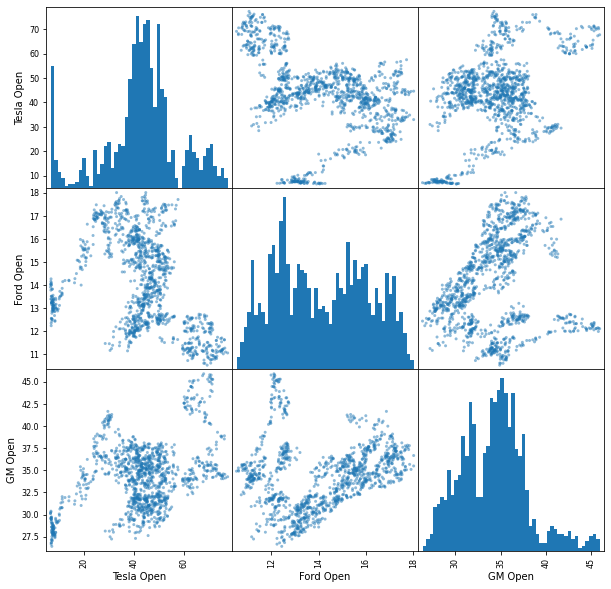

In [24]:
scatter_matrix(car_companies, figsize = (10, 10), hist_kwds={'bins': 50})

In [20]:
fig = px.scatter_matrix(car_companies)
fig.show()

## Plotting candlestick 

In [33]:
temp = tesla.iloc[1:30]
temp.head()

,High,Low,Open,Close,Volume,Adj Close,TotalTraded
Date,,,,,,,
2013-01-03,7.090,6.950,7.036,6.954,3710000,6.954,2.610356e+07
2013-01-04,6.960,6.784,6.960,6.880,3370000,6.880,2.345520e+07
2013-01-07,6.960,6.780,6.960,6.868,2210000,6.868,1.538160e+07
2013-01-08,6.900,6.622,6.900,6.736,6420000,6.736,4.429800e+07
2013-01-09,6.838,6.680,6.802,6.728,3490000,6.728,2.373898e+07


In [34]:
fig = go.Figure(data=[go.Candlestick(x=temp.index.get_level_values('Date'),
                open=temp['Open'],
                high=temp['High'],
                low=temp['Low'],
                close=temp['Close'])])

fig.show()

## Daily Percentage Change


rt = (pt / pt-1) - 1

This gives information about stability



In [41]:
tesla['returns'] = (tesla['Close']/tesla['Close'].shift(1)) - 1
ford['returns'] = (ford['Close']/ford['Close'].shift(1)) - 1
gm_motors['returns'] = (gm_motors['Close']/gm_motors['Close'].shift(1)) - 1
tesla.head()

,High,Low,Open,Close,Volume,Adj Close,TotalTraded,returns
Date,,,,,,,,
2013-01-02,7.09,6.942,7.000,7.072,5974000,7.072,4.181800e+07,NaN
2013-01-03,7.09,6.950,7.036,6.954,3710000,6.954,2.610356e+07,-0.016686
2013-01-04,6.96,6.784,6.960,6.880,3370000,6.880,2.345520e+07,-0.010641
2013-01-07,6.96,6.780,6.960,6.868,2210000,6.868,1.538160e+07,-0.001744
2013-01-08,6.90,6.622,6.900,6.736,6420000,6.736,4.429800e+07,-0.019220


In [49]:
tesla['name'] = 'Tesla'
ford['name'] = 'Ford'
gm_motors['name'] = 'GM'

temp = pd.concat([tesla, ford, gm_motors])
temp.head()

,High,Low,Open,Close,Volume,Adj Close,TotalTraded,returns,name
Date,,,,,,,,,
2013-01-02,7.09,6.942,7.000,7.072,5974000.0,7.072,4.181800e+07,NaN,Tesla
2013-01-03,7.09,6.950,7.036,6.954,3710000.0,6.954,2.610356e+07,-0.016686,Tesla
2013-01-04,6.96,6.784,6.960,6.880,3370000.0,6.880,2.345520e+07,-0.010641,Tesla
2013-01-07,6.96,6.780,6.960,6.868,2210000.0,6.868,1.538160e+07,-0.001744,Tesla
2013-01-08,6.90,6.622,6.900,6.736,6420000.0,6.736,4.429800e+07,-0.019220,Tesla


In [52]:
fig = px.histogram(temp, x = 'returns', color = 'name', barmode = 'overlay')
fig.show()

## Box Plot
From the box plot we can infer that Tesla stocks are much more volitile compared to GM and Ford.

Therefore, for someone looking for stability in investment tesla is not the first choice

In [59]:
fig = px.box(temp,x = 'name', y = 'returns')
fig.show()

## Cumulative Return

Ct = (1 - rt)i-1

Cummulative return : for every one dollar you invested on the start date what is the return

Note: for row 2 the value is close to 1 ie your starting one dollar

In [60]:
tesla['Cumulative Return'] = (1 + tesla['returns']).cumprod()
tesla.head()

,High,Low,Open,Close,Volume,Adj Close,TotalTraded,returns,name,Cumulative Return
Date,,,,,,,,,,
2013-01-02,7.09,6.942,7.000,7.072,5974000,7.072,4.181800e+07,NaN,Tesla,NaN
2013-01-03,7.09,6.950,7.036,6.954,3710000,6.954,2.610356e+07,-0.016686,Tesla,0.983314
2013-01-04,6.96,6.784,6.960,6.880,3370000,6.880,2.345520e+07,-0.010641,Tesla,0.972851
2013-01-07,6.96,6.780,6.960,6.868,2210000,6.868,1.538160e+07,-0.001744,Tesla,0.971154
2013-01-08,6.90,6.622,6.900,6.736,6420000,6.736,4.429800e+07,-0.019220,Tesla,0.952489


In [61]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=tesla.index.get_level_values('Date'), y = tesla['Cumulative Return'], mode = 'lines', name = 'Cumulative Return'))
fig.update_layout(title = 'Cumulative Return for Tesla', yaxis_title = 'Stock Prices', xaxis_title = 'Date')
fig.show()

In [62]:
ford['Cumulative Return'] = (1 + ford['returns']).cumprod()
gm_motors['Cumulative Return'] = (1 + gm_motors['returns']).cumprod()


In [63]:
# Plotting Cumulative Return for all to see which yeild most profit over time
fig = go.Figure()
fig.add_trace(go.Scatter(x=tesla.index.get_level_values('Date'), y = tesla['Cumulative Return'], mode = 'lines', name = 'Tesla Cumulative Return'))
fig.add_trace(go.Scatter(x=ford.index.get_level_values('Date'), y = ford['Cumulative Return'], mode = 'lines', name = 'Ford Cumulative Return'))
fig.add_trace(go.Scatter(x=gm_motors.index.get_level_values('Date'), y = gm_motors['Cumulative Return'], mode = 'lines', name = 'GM Cumulative Return'))
fig.update_layout(title = 'Cumulative Return', xaxis_title = 'Date')
fig.show()

**From the above graph we can conclude that Tesla shows max profit.**

If I invested one dollar in Tesla back in 2013, by the end of 2017 I would make a total of 9 dollars on each dollar invested.


However, if I invested one dollar in Ford or GM back in 2013, by the end of 2017 I would make a total of 1.40 cents and lost 5 cent on each dollar for the 2 companies respectively.
